In [2]:
user = "Alex"
pathtorepo = "C:\\Users\\" *user *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\bifurcation\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\bifurcation`

In [3]:
using BifurcationKit, LinearAlgebra, Plots, Parameters, JLD2
const BK = BifurcationKit

BifurcationKit

In [41]:
τ_ = 0.013; τD_ = 0.07993;  τy_ = 3.3; J_ = 3.07; β_ = 0.300
xthr_ = 0.75; ythr_ = 0.4
α_ = 1.58; ΔU0_ = 0.305
I0_ = -0.05; U0_ = -0.15; 

@inbounds function TM_bk!(du, u, p, t = 0)
    U_ = p[8] + p[9] / ( 1.0 + exp( -50.0 * (u[3] - p[7]) ) )
    σ = 1.0 / ( 1.0 + exp( -20.0 * (u[2]-p[6]) ) )
    g(E, x, y, p, U_) = log( 1.0 + exp( (p[5] * U_ * x * E + p[11]  ) / (p[1]) ) )
    
    du[1] = (-u[1] + p[1] * g(u[1], u[2], u[3], p, U_) ) / p[2]
    du[2] = (1.0 - u[2]) / p[3] - U_*u[2]*u[1]
    du[3] = (-u[3])/p[4] + p[10] * σ
    
    return du
end

TM_bk! (generic function with 2 methods)

In [60]:
TM_bk(u, p) = TM_bk!(similar(u), u, p, 0)

p_tm = (α = α_, τ = τ_, τD = τD_, τy = τy_, J = J_, xthr = xthr_, ythr = ythr_, U0 = U0_, ΔU0 = ΔU0_, β = β_, I0 = I0_)
fp0 = [121.59507621380374, -2.1840538898271444, 3.241655919302998e-26]

prob =  BifurcationProblem(TM_bk, fp0, p_tm, (@lens _.U0))

opt_new = NewtonPar(maxIter = 3, tol = 1e-6)
pmax, pmin = 0.6, -0.15

opts_con = ContinuationPar(pMin = pmin, pMax = pmax,
                            ds = 0.001, dsmin = 1e-6, dsmax = 0.1,
                            nev = 3, detectBifurcation = 3, newtonOptions  = opt_new,
                            maxSteps  = 2000, nInversion = 6)

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 1.0e-6
  dsmax: Float64 0.1
  ds: Float64 0.001
  a: Float64 0.5
  pMin: Float64 -0.15
  pMax: Float64 0.6
  maxSteps: Int64 2000
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 1
  nev: Int64 3
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  tolStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 3
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 6
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


In [63]:
br = continuation(prob, PALC(), opts_con)

 ┌─ Curve type: EquilibriumCont
 ├─ Number of points: 2001
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter U0 starts at -0.15, ends at -0.02200323217418635
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ≈ -0.02199376,                                                                     step = 2001


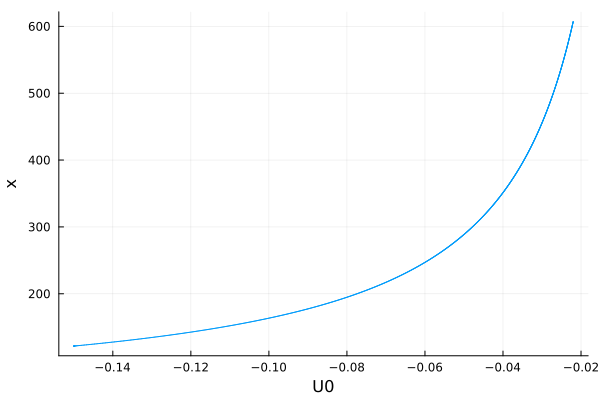

In [64]:
plot(br)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
────────────────── PALC ──────────────────



━━━━━━━━━━━━━━━━━━  INITIAL GUESS   ━━━━━━━━━━━━━━━━━━


──▶ convergence of initial guess = OK

──▶ parameter = 0.265, initial step



━━━━━━━━━━━━━━━━━━ INITIAL TANGENT  ━━━━━━━━━━━━━━━━━━
──▶ convergence of the initial guess = OK

──▶ parameter = 0.26500666666666667, initial step (bis)


Predictor:  Secant


───────────────────────────────────────────────────────
Continuation Step 0 
Step size = 1.0000e-03
Parameter U0

 = 2.6500e-01 ⟶  2.6508e-01 [guess]


──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6500e-01 ⟶  2.6508e-01


──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant


──> Event values: (16.201638308453745, -0.1554443903466805, 0)
              ──> (16.204670354929423, -0.15536291725154225, 0)
───────────────────────────────────────────────────────
Continuation Step 1 
Step size = 1.2222e-03
Parameter U0 = 2.6508e-01 ⟶  2.6517e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6508e-01 ⟶  2.6517e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.204670354929423, -0.15536291725154225, 0)
              ──> (16.20837571399167, -0.1552634966422905, 0)
───────────────────────────────────────────────────────
Continuation Step 2 
Step size = 1.4938e-03
Parameter U0 = 2.6517e-01 ⟶  2.6528e-01 [guess]
──> Step Converged in 1 Nonlinear Iteration(s)
Parameter U0 = 2.6517e-01 ⟶  2.6528e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.20837571399167, -0.1552634966422905, 0)
              ──> (16.212904334887664, -0.15514209987500982, 

──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.503397988991882, -0.14758243192354384, 0)
              ──> (16.551670832978427, -0.146361112934238, 0)
───────────────────────────────────────────────────────
Continuation Step 17 
Step size = 1.6861e-02
Parameter U0 = 2.7515e-01 ⟶  2.7682e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.7515e-01 ⟶  2.7690e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.551670832978427, -0.146361112934238, 0)
              ──> (16.602593124241896, -0.1450798681251697, 0)
───────────────────────────────────────────────────────
Continuation Step 18 
Step size = 1.7797e-02
Parameter U0 = 2.7690e-01 ⟶  2.7875e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 2.7690e-01 ⟶  2.7884e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.602593124241896, -0.1450

Predictor:  Secant
──> Event values: (17.122755730036584, -0.13165154118362307, 0)
              ──> (17.203688717686955, -0.12917058571797543, 0)
───────────────────────────────────────────────────────
Continuation Step 27 
Step size = 2.8953e-02
Parameter U0 = 3.0931e-01 ⟶  3.1639e-01 [guess]
──> Step Converged in 3 Nonlinear Iteration(s)
Parameter U0 = 3.0931e-01 ⟶  3.1872e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.203688717686955, -0.12917058571797543, 0)
              ──> (17.28759204932974, -0.12608057451700472, 0)
───────────────────────────────────────────────────────
Continuation Step 28 
Step size = 2.8953e-02
Parameter U0 = 3.1872e-01 ⟶  3.2810e-01 [guess]
Newton correction failed
Halve ds = 0.014476301864377178
Predictor:  Secant
───────────────────────────────────────────────────────
Continuation Step 28 
Step size = 1.4476e-02
Parameter U0 = 3.1872e-01 ⟶  3.2341e-01 [guess]
──> Step Converged in 3 Nonlinear Itera

──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.5719e-01 ⟶  3.6029e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.343466785225264, -0.11571418762805533, 0)
              ──> (17.33110387807536, -0.11492741102029166, 0)
───────────────────────────────────────────────────────
Continuation Step 36 
Step size = 5.0059e-03
Parameter U0 = 3.6029e-01 ⟶  3.6355e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.6029e-01 ⟶  3.6319e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.33110387807536, -0.11492741102029166, 0)
              ──> (17.317557848716813, -0.11418897016772706, 0)
───────────────────────────────────────────────────────
Continuation Step 37 
Step size = 5.2840e-03
Parameter U0 = 3.6319e-01 ⟶  3.6623e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.6319e-01 ⟶  3.6594e-01
──> Computed 3 eigenvalues in 1 i


──> Event values: (17.213210376360244, -0.11008921592969548, 0)
              ──> (17.19177038070574, -0.10940155656267958, 0)
───────────────────────────────────────────────────────
Continuation Step 44 
Step size = 7.7149e-03
Parameter U0 = 3.8123e-01 ⟶  3.8386e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.8123e-01 ⟶  3.8372e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.19177038070574, -0.10940155656267958, 0)
              ──> (17.169049679504848, -0.10870161009646974, 0)
───────────────────────────────────────────────────────
Continuation Step 45 
Step size = 8.1436e-03
Parameter U0 = 3.8372e-01 ⟶  3.8635e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 3.8372e-01 ⟶  3.8622e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (17.169049679504848, -0.10870161009646974, 0)
              ──> (17.144986723397395, -0.1079860812954


──> Event values: (16.855268737376385, -0.10029121906024943, 0)
              ──> (16.81323561798999, -0.09922544969428815, 0)
───────────────────────────────────────────────────────
Continuation Step 56 
Step size = 1.4761e-02
Parameter U0 = 4.1297e-01 ⟶  4.1600e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 4.1297e-01 ⟶  4.1590e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.81323561798999, -0.09922544969428815, 0)
              ──> (16.768826202744933, -0.09809966766383374, 0)
───────────────────────────────────────────────────────
Continuation Step 57 
Step size = 1.5581e-02
Parameter U0 = 4.1590e-01 ⟶  4.1900e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 4.1590e-01 ⟶  4.1890e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.768826202744933, -0.09809966766383374, 0)
              ──> (16.72190939822521, -0.09690751948497

Step size = 2.5346e-02
Parameter U0 = 4.4555e-01 ⟶  4.4937e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 4.4555e-01 ⟶  4.4926e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.23790365780861, -0.08392571695116889, 0)
              ──> (16.161138198972303, -0.08168771602025462, 0)
───────────────────────────────────────────────────────
Continuation Step 67 
Step size = 2.6755e-02
Parameter U0 = 4.4926e-01 ⟶  4.5318e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 4.4926e-01 ⟶  4.5307e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (16.161138198972303, -0.08168771602025462, 0)
              ──> (16.08006658924596, -0.07925503661417505, 0)
───────────────────────────────────────────────────────
Continuation Step 68 
Step size = 2.8241e-02
Parameter U0 = 4.5307e-01 ⟶  4.5710e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Pa

──> Event detected before p = 0.5209558690223135
────> Entering [Event], indicator of 2 last events = 

((2, 0), (1, 0))
────> [Bisection] initial ds = 0.06603932223733572
────> [Bisection] state.ds = -0.06603932223733572
──> eve (initial) (14.488916853330979, -0.00837854325216152, 0) ──> (14.298556697772813, 0.004760540151225588, 0)

──> eigvals = 


-3.0310176590830906e-9 - 14.298556703235175im
-3.0310176590830906e-9 + 14.298556703235175im
-3.2635568749029717 + 0.0im

────> eve (current) (14.298556697772813, 0.004760540151225588, 0) ──> (14.298556697772813, 0.004760540151225588, 0)
────> eigvals = 
-3.0310176590830906e-9 - 14.298556703235175im
-3.0310176590830906e-9 + 14.298556703235175im
-3.2635568749029717 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((1, 0), (2, 0), (2, 0))
			ds = -0.03301966111866786, p = 0.5209558690223135, #reverse = 0
────> event ∈ (0.5144599311992005, 0.5209558690223135), precision = 6.496E-03
Predictor:  Secant

────> eve (current) (14.298556697772813, 0.004760540151225588, 0) ──> (14.399002899784376, -0.002363368021448844, 0)
────> eigvals = 
-8.955058916626513e-13 - 14.399002899786487im
-8.955058916626513e-13 + 14.399002899786487im
-3.4839342978064316 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((1, 0), (1, 0), (2, 0))
			ds = 0.01650983055933393, p = 0.5175308766262517, #reverse = 1
───



────> eve (current) (14.399002899784376, -0.002363368021448844, 0) ──> (14.348774255826777, 0.0011428230059462169, 0)
────> eigvals = 
-1.9984014443252818e-15 - 14.348774255826774im
-1.9984014443252818e-15 + 14.348774255826774im
-3.374039036648799 + 0.0im
────> 2 - [Bisection] (n1, n_current, n2) = ((1, 0), (2, 0), (2, 0))
			ds = -0.008254915279666965, p = 0.5192436327645904, #reverse = 2
────> event ∈ (0.5175308766262517, 0.5192436327645904), precision = 1.713E-03
Predictor:  Secant

────> eve (current) (14.348774255826777, 0.0011428230059462169, 0) ──> (14.373887265187097, -0.0006238126821803275, 0)
────> eigvals = 
-2.5920193547079862e-8 - 14.373887272635423im
-2.5920193547079862e-8 + 14.373887272635423im
-3.4290561733463383 + 0.0im
────> 3 - [Bisection] (n1, n_current, n2) = ((1, 0), (1, 0), (2, 0))
			ds = 0.004127457639833482, p = 0.5183874138615684, #reverse = 3
────> event ∈ (0.5183874138615684, 0.5192436327645904), precision = 8.562E-04
Predictor:  Secant

────> eve (curren

────> Found at p = 0.5187085232605007 ∈ (0.5186014911152221, 0.5187085232605007), 
			  δn = (1, 0), from p = 0.5209558690223135
────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = false
──────> n_inversion >= nInversion = true
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.5187085232605007 
───────────────────────────────────────────────────────
Continuation Step 81 
Step size = 6.6039e-02
Parameter U0 = 5.1871e-01 ⟶  5.2556e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 5.1871e-01 ⟶  5.2557e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.364469575692926, 3.545837564979115e-5, 0)
              ──> (14.163671947739713, 0.015091336382057015, 0)
──> Event detected before p = 0.5255678309253766
────> Entering [Event], indicato

────> eigvals = 
-3.283323857239395e-8 - 14.36498573620952im
-3.283323857239395e-8 + 14.36498573620952im
-3.409571806394634 + 0.0im
────> 13 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (2, 0))
			ds = 4.25464925981099e-6, p = 0.5186909248250599, #reverse = 5
────> event ∈ (0.5186909248250599, 0.518691807458182), precision = 8.826E-07
Predictor:  Secant

────> eve (current) (14.36498573251061, -7.715315384002053e-7, 0) ──> (14.364972788857896, 1.3675972199145292e-7, 0)
────> eigvals = 
-3.089304811965121e-8 - 14.364972792338271im
-3.089304811965121e-8 + 14.364972792338271im
-3.4095434625863463 + 0.0im
────> 14 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -2.127324629905495e-6, p = 0.5186913661416209, #reverse = 6
────> event ∈ (0.5186909248250599, 0.5186913661416209), precision = 4.413E-07
────> Found at p = 0.5186913661416209 ∈ (0.5186909248250599, 0.5186913661416209), 
			  δn = (0, 0), from p = 0.5255678309253766
──────────────────────────────────────

────> 5 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (2, 0))
			ds = 0.0011497007777622587, p = 0.518528397055435, #reverse = 1
────> event ∈ (0.518528397055435, 0.5187669079417494), precision = 2.385E-04
Predictor:  Secant

────> eve (current) (14.369752523028092, -0.00033484235342713664, 0) ──> (14.366254817548365, -8.981174274128728e-5, 0)
────> eigvals = 
-9.96958071652898e-12 - 14.36625481755123im
-9.96958071652898e-12 + 14.36625481755123im
-3.412350831718769 + 0.0im
────> 6 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (2, 0))
			ds = 0.0005748503888811294, p = 0.5186476549219908, #reverse = 1
────> event ∈ (0.5186476549219908, 0.5187669079417494), precision = 1.193E-04
Predictor:  Secant

────> eve (current) (14.366254817548365, -8.981174274128728e-5, 0) ──> (14.364505983894341, 3.290222805303611e-5, 0)
────> eigvals = 
-5.56510393323606e-12 - 14.364505983895937im
-5.56510393323606e-12 + 14.364505983895937im
-3.4085212003923067 + 0.0im
────> 7 - [Bisection] (n1, n

Predictor:  Secant

────> eve (current) (14.362630863099055, 0.00016462945531876827, 0) ──> (14.370014860315681, -0.00035319883133214797, 0)
────> eigvals = 
-1.8067900509066703e-9 - 14.370014860831942im
-1.8067900509066703e-9 + 14.370014860831942im
-3.420582235130191 + 0.0im
────> 5 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (2, 0))
			ds = 0.0012135730431934953, p = 0.5185194522477842, #reverse = 1
────> event ∈ (0.5185194522477842, 0.5187712140071262), precision = 2.518E-04
Predictor:  Secant

────> eve (current) (14.370014860315681, -0.00035319883133214797, 0) ──> (14.366322835354364, -9.4581790133004e-5, 0)
────> eigvals = 
-1.2394751891520173e-11 - 14.366322835357956im
-1.2394751891520173e-11 + 14.366322835357956im
-3.4124997640557266 + 0.0im
────> 6 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (2, 0))
			ds = 0.0006067865215967477, p = 0.5186453358183691, #reverse = 1
────> event ∈ (0.5186453358183691, 0.5187712140071262), precision = 1.259E-04
Predictor:  Seca

────> eigvals = 
-3.705561013589431e-8 - 14.362496446491292im
-3.705561013589431e-8 + 14.362496446491292im
-3.4041197222326445 + 0.0im
────> 4 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0025619875356307125, p = 0.5187757972872418, #reverse = 0
────> event ∈ (0.5186915572375695, 0.5187757972872418), precision = 8.424E-05
Predictor:  Secant

────> eve (current) (14.362496435846165, 0.0001740794592413955, 0) ──> (14.370290658040977, -0.00037249394431714683, 0)
────> eigvals = 
-2.244798791295466e-9 - 14.370290658681965im
-2.244798791295466e-9 + 14.370290658681965im
-3.42118587601308 + 0.0im
────> 5 - [Bisection] (n1, n_current, n2) = ((2, 0), (1, 0), (2, 0))
			ds = 0.0012809937678153562, p = 0.5185100484617826, #reverse = 1
────> event ∈ (0.5185100484617826, 0.5187757972872418), precision = 2.657E-04
Predictor:  Secant

────> eve (current) (14.370290658040977, -0.00037249394431714683, 0) ──> (14.366393517807412, -9.953849381342389e-5, 0)
────> eigvals = 
-1.5


!! Continuous user point at p ≈ 0.5186917151561229 
───────────────────────────────────────────────────────
Continuation Step 85 
Step size = 8.1984e-02
Parameter U0 = 5.1869e-01 ⟶  5.2720e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 5.1869e-01 ⟶  5.2722e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.364962552462005, 8.535145427021607e-7, 0)
              ──> (14.115728021089966, 0.019003125172031038, 0)
──> Event detected before p = 0.5272173453524023
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.08653824564797073
────> [Bisection] state.ds = -0.08653824564797073
──> eve (initial) (14.364962552462005, 8.535145427021607e-7, 0) ──> (14.115728021089966, 0.019003125172031038, 0)

──> eigvals = 
-5.949969406060518e-10 - 14.115728028200667im
-5.949969406060518e-10 + 14.115728028200667im
-2.854910928818133 + 0.0im

────> eve (current) (14.115728021089

────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = false
──────> n_inversion >= nInversion = true
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.5186919277727392 
───────────────────────────────────────────────────────
Continuation Step 86 
Step size = 8.6538e-02
Parameter U0 = 5.1869e-01 ⟶  5.2767e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 5.1869e-01 ⟶  5.2770e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.364956316483706, 1.2913321851687476e-6, 0)
              ──> (14.101889569756448, 0.020158008213118875, 0)
──> Event detected before p = 0.527695016599878
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.09134592596174688
────> [Bisection] state.ds = -0.09134592



────> eve (current) (14.31010147950037, 0.003918550251145826, 0) ──> (14.34483270916251, 0.0014226284826885857, 0)
────> eigvals = 
-3.1530333899354446e-14 - 14.344832709162615im
-3.1530333899354446e-14 + 14.344832709162615im
-3.3653903075065803 + 0.0im
────> 3 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.00570912037260918, p = 0.519378009913969, #reverse = 0
────> event ∈ (0.5186919277727392, 0.519378009913969), precision = 6.861E-04
Predictor:  Secant

────> eve (current) (14.34483270916251, 0.0014226284826885857, 0) ──> (14.362200361375724, 0.0001948962639239729, 0)
────> eigvals = 
-5.742556075105654e-8 - 14.362200377861503im
-5.742556075105654e-8 + 14.362200377861503im
-3.4034711370745954 + 0.0im
────> 4 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.00285456018630459, p = 0.518785891916819, #reverse = 0
────> event ∈ (0.5186919277727392, 0.518785891916819), precision = 9.396E-05
Predictor:  Secant

────> eve (current) (14.3622

────> eigvals = 
1.7657209028243415e-11 - 14.307044196943032im
1.7657209028243415e-11 + 14.307044196943032im
-3.282275765583328 + 0.0im
────> 2 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.012052587453286048, p = 0.520666417448249, #reverse = 0
────> event ∈ (0.518692207831307, 0.520666417448249), precision = 1.974E-03
Predictor:  Secant

────> eve (current) (14.307044196896152, 0.004140917047469932, 0) ──> (14.343704586519191, 0.0015028402049154718, 0)
────> eigvals = 
-1.9984014443252818e-15 - 14.343704586519312im
-1.9984014443252818e-15 + 14.343704586519312im
-3.3629142306343613 + 0.0im
────> 3 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.006026293726643024, p = 0.5194164703558436, #reverse = 0
────> event ∈ (0.518692207831307, 0.5194164703558436), precision = 7.243E-04
Predictor:  Secant

────> eve (current) (14.343704586519191, 0.0015028402049154718, 0) ──> (14.36203705799371, 0.0002063799839076147, 0)
────> eigvals = 
-7.15051

U0 = 5.1869e-01 ⟶  5.2869e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 5.1869e-01 ⟶  5.2873e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.36497325896724, 1.0386420738056623e-7, 0)
              ──> (14.071900943018582, 0.022702410380560055, 0)
──> Event detected before p = 0.5287330316354005
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.1
────> [Bisection] state.ds = -0.1
──> eve (initial) (14.36497325896724, 1.0386420738056623e-7, 0) ──> (14.071900943018582, 0.022702410380560055, 0)

──> eigvals = 
-1.6033505634283074e-9 - 14.071900970232766im
-1.6033505634283074e-9 + 14.071900970232766im
-2.755086411341811 + 0.0im

────> eve (current) (14.071900943018582, 0.022702410380560055, 0) ──> (14.071900943018582, 0.022702410380560055, 0)
────> eigvals = 
-1.6033505634283074e-9 - 14.071900970232766im
-1.6033505634283074e-9 + 14.071900970232766im
-2.7550

──> Event detected before p = 0.5291118835666132
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.1
────> [Bisection] state.ds = -0.1
──> eve (initial) (14.364924332339399, 3.541772492635098e-6, 0) ──> (14.06098709249115, 0.0236430271282582, 0)

──> eigvals = 
-1.9225606662232053e-9 - 14.06098712904934im
-1.9225606662232053e-9 + 14.06098712904934im
-2.7300913788465393 + 0.0im

────> eve (current) (14.06098709249115, 0.0236430271282582, 0) ──> (14.06098709249115, 0.0236430271282582, 0)
────> eigvals = 
-1.9225606662232053e-9 - 14.06098712904934im
-1.9225606662232053e-9 + 14.06098712904934im
-2.7300913788465393 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.05, p = 0.5291118835666132, #reverse = 0
────> event ∈ (0.5186930182692169, 0.5291118835666132), precision = 1.042E-02
Predictor:  Secant

────> eve (current) (14.06098709249115, 0.0236430271282582, 0) ──> (14.212846631789432, 0.011215127951



────> eve (current) (14.364307269818598, 4.685425264527171e-5, 0) ──> (14.36460436254506, 2.5995547504570338e-5, 0)
────> eigvals = 
1.7763568394002505e-15 - 14.364604362545073im
1.7763568394002505e-15 + 14.364604362545073im
-3.408736650939826 + 0.0im
────> 10 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -4.8828125e-5, p = 0.5187039276926061, #reverse = 0
────> event ∈ (0.5186930182692169, 0.5187039276926061), precision = 1.091E-05
Predictor:  Secant

────> eve (current) (14.36460436254506, 2.5995547504570338e-5, 0) ──> (14.364752908908228, 1.5562196689300478e-5, 0)
────> eigvals = 
5.899825339383824e-8 - 14.364752902263737im
5.899825339383824e-8 + 14.364752902263737im
-3.4090620161607905 + 0.0im
────> 11 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -2.44140625e-5, p = 0.5186988629962195, #reverse = 0
────> event ∈ (0.5186930182692169, 0.5186988629962195), precision = 5.845E-06
Predictor:  Secant

────> eve (current) (14.364752908908228

-3.4041110444040417 + 0.0im
────> 7 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.000390625, p = 0.5187759328707354, #reverse = 0
────> event ∈ (0.5186941148001782, 0.5187759328707354), precision = 8.182E-05
Predictor:  Secant

────> eve (current) (14.362492453734959, 0.0001743552256025932, 0) ──> (14.363680817758748, 9.084972703393701e-5, 0)
────> eigvals = 
-1.1808332089913165e-12 - 14.363680817759082im
-1.1808332089913165e-12 + 14.363680817759082im
-3.406713986447024 + 0.0im
────> 8 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0001953125, p = 0.5187354159305844, #reverse = 0
────> event ∈ (0.5186941148001782, 0.5187354159305844), precision = 4.130E-05
Predictor:  Secant

────> eve (current) (14.363680817758748, 9.084972703393701e-5, 0) ──> (14.364275002012446, 4.911998850527094e-5, 0)
────> eigvals = 
-7.416289804496046e-14 - 14.364275002012462im
-7.416289804496046e-14 + 14.364275002012462im
-3.4080153381297627 + 0.0im
────> 9 - [

────> 2 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0125, p = 0.5212888509385426, #reverse = 0
────> event ∈ (0.5186952149789726, 0.5212888509385426), precision = 2.594E-03
Predictor:  Secant

────> eve (current) (14.288794348891527, 0.005477447062156304, 0) ──> (14.326812173600636, 0.002710780131960036, 0)
────> eigvals = 
3.6637359812630166e-14 - 14.326812173600816im
3.6637359812630166e-14 + 14.326812173600816im
-3.325800005940265 + 0.0im
────> 3 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.00625, p = 0.5199923839940515, #reverse = 0
────> event ∈ (0.5186952149789726, 0.5199923839940515), precision = 1.297E-03
Predictor:  Secant

────> eve (current) (14.326812173600636, 0.002710780131960036, 0) ──> (14.345823731012574, 0.0013522118423074936, 0)
────> eigvals = 
8.881784197001252e-15 - 14.345823731012556im
8.881784197001252e-15 + 14.345823731012556im
-3.367565210349828 + 0.0im
────> 4 - [Bisection] (n1, n_current, n2) = ((2, 0), (


────> eve (current) (14.060890532132946, 0.023651384916875264, 0) ──> (14.060890532132946, 0.023651384916875264, 0)
────> eigvals = 
-1.9516459559554278e-9 - 14.060890569056559im
-1.9516459559554278e-9 + 14.060890569056559im
-2.7298699799253843 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.05, p = 0.529115238236816, #reverse = 0
────> event ∈ (0.5186963152621409, 0.529115238236816), precision = 1.042E-02
Predictor:  Secant

────> eve (current) (14.060890532132946, 0.023651384916875264, 0) ──> (14.21274990535171, 0.011222623673996762, 0)
────> eigvals = 
2.379763053284023e-11 - 14.212749905567167im
2.379763053284023e-11 + 14.212749905567167im
-3.0731547024003216 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.025, p = 0.5238861031976484, #reverse = 0
────> event ∈ (0.5186963152621409, 0.5238861031976484), precision = 5.190E-03
Predictor:  Secant

────> eve (current) (14.21274990535171, 0.01122262367399676



────> eve (current) (14.345791459690314, 0.0013545041764349772, 0) ──> (14.355297853816285, 0.0006812390195505627, 0)
────> eigvals = 
-5.074344278099829e-9 - 14.355297855293172im
-5.074344278099829e-9 + 14.355297855293172im
-3.388345173150417 + 0.0im
────> 5 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0015625, p = 0.5190212246003386, #reverse = 0
────> event ∈ (0.5186963152621409, 0.5190212246003386), precision = 3.249E-04
Predictor:  Secant

────> eve (current) (14.355297853816285, 0.0006812390195505627, 0) ──> (14.360051200023948, 0.0003460945544897856, 0)
────> eigvals = 
-3.1129454569622794e-10 - 14.360051200114192im
-3.1129454569622794e-10 + 14.360051200114192im
-3.3987627832794747 + 0.0im
────> 6 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.00078125, p = 0.5188591657452755, #reverse = 0
────> event ∈ (0.5186963152621409, 0.5188591657452755), precision = 1.629E-04
Predictor:  Secant

────> eve (current) (14.360051200023948,

3.3266056576053415e-11 + 14.288729822437938im
-3.2418597212916884 + 0.0im
────> 2 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0125, p = 0.5212910520774023, #reverse = 0
────> event ∈ (0.5186974156496781, 0.5212910520774023), precision = 2.594E-03
Predictor:  Secant

────> eve (current) (14.288729822368575, 0.005482200742379206, 0) ──> (14.32674763377455, 0.002715420062748594, 0)
────> eigvals = 
1.3100631690576847e-14 - 14.32674763377472im
1.3100631690576847e-14 + 14.32674763377472im
-3.325658068699387 + 0.0im
────> 3 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.00625, p = 0.5199945844314333, #reverse = 0
────> event ∈ (0.5186974156496781, 0.5199945844314333), precision = 1.297E-03
Predictor:  Secant

────> eve (current) (14.32674763377455, 0.002715420062748594, 0) ──> (14.345759185298018, 0.0013567967751456078, 0)
────> eigvals = 
-2.1538326677728037e-14 - 14.345759185298018im
-2.1538326677728037e-14 + 14.345759185298018im
-3.3674



────> eve (current) (14.364475272742743, 3.5058392556457096e-5, 0) ──> (14.364623819024946, 2.4624208522588953e-5, 0)
────> eigvals = 
5.900374211442738e-8 - 14.364623812379627im
5.900374211442738e-8 + 14.364623812379627im
-3.4087793116486553 + 0.0im
────> 11 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -2.44140625e-5, p = 0.5187032643304184, #reverse = 0
────> event ∈ (0.5186974156496781, 0.5187032643304184), precision = 5.849E-06
Predictor:  Secant

────> eve (current) (14.364623819024946, 2.4624208522588953e-5, 0) ──> (14.364698092410576, 1.94156292000619e-5, 0)
────> eigvals = 
-6.8833827526759706e-15 - 14.364698092410576im
-6.8833827526759706e-15 + 14.364698092410576im
-3.408941918472718 + 0.0im
────> 12 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -1.220703125e-5, p = 0.5187007319630705, #reverse = 0
────> event ∈ (0.5186974156496781, 0.5187007319630705), precision = 3.316E-06
Predictor:  Secant

────> eve (current) (14.3646980924

-3.406431223850532 + 0.0im
────> 8 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0001953125, p = 0.5187398176297633, #reverse = 0
────> event ∈ (0.5186985161416442, 0.5187398176297633), precision = 4.130E-05
Predictor:  Secant

────> eve (current) (14.363551716162752, 9.991861249910444e-5, 0) ──> (14.364145900091827, 5.81855426151634e-5, 0)
────> eigvals = 
-8.926193117986259e-14 - 14.364145900091838im
-8.926193117986259e-14 + 14.364145900091838im
-3.4077325928021684 + 0.0im
────> 9 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -9.765625e-5, p = 0.518719558985767, #reverse = 0
────> event ∈ (0.5186985161416442, 0.518719558985767), precision = 2.104E-05
Predictor:  Secant

────> eve (current) (14.364145900091827, 5.81855426151634e-5, 0) ──> (14.364442992615851, 3.7324756539953985e-5, 0)
────> eigvals = 
4.884981308350689e-15 - 14.364442992615844im
4.884981308350689e-15 + 14.364442992615844im
-3.408383247479623 + 0.0im
────> 10 - [Bisectio



────> eve (current) (14.060793944363304, 0.02365974572545318, 0) ──> (14.212653151340604, 0.011230122029079269, 0)
────> eigvals = 
2.328959247677176e-11 - 14.212653151556756im
2.328959247677176e-11 + 14.212653151556756im
-3.0729387304190032 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.025, p = 0.5238894133379771, #reverse = 0
────> event ∈ (0.5186996167380685, 0.5238894133379771), precision = 5.190E-03
Predictor:  Secant

────> eve (current) (14.212653151340604, 0.011230122029079269, 0) ──> (14.28866528357171, 0.0054869555262556, 0)
────> eigvals = 
3.289124528293996e-11 - 14.288665283641354im
3.289124528293996e-11 + 14.288665283641354im
-3.2417171361093935 + 0.0im
────> 2 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0125, p = 0.5212932536379916, #reverse = 0
────> event ∈ (0.5186996167380685, 0.5212932536379916), precision = 2.594E-03
Predictor:  Secant

────> eve (current) (14.28866528357171, 0.0054869555262556,

Step size = 1.0000e-01
Parameter U0 = 5.1870e-01 ⟶  5.2907e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 5.1870e-01 ⟶  5.2912e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.36469851821897, 1.9389759036071708e-5, 0)
              ──> (14.060761742334357, 0.023662533329331742, 0)
──> Event detected before p = 0.5291197127009989
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.1
────> [Bisection] state.ds = -0.1
──> eve (initial) (14.36469851821897, 1.9389759036071708e-5, 0) ──> (14.060761742334357, 0.023662533329331742, 0)

──> eigvals = 
-1.9459178712821767e-9 - 14.060761779276405im
-1.9459178712821767e-9 + 14.060761779276405im
-2.729574675820307 + 0.0im

────> eve (current) (14.060761742334357, 0.023662533329331742, 0) ──> (14.060761742334357, 0.023662533329331742, 0)
────> eigvals = 
-1.9459178712821767e-9 - 14.060761779276405im
-1.9459178712821767e

Predictor:  Secant

────> eve (current) (14.364656947738789, 2.2307463130435967e-5, 0) ──> (14.364666231908195, 2.1656242476193743e-5, 0)
────> eigvals = 
-4.35708031876203e-8 - 14.364666236813974im
-4.35708031876203e-8 + 14.364666236813974im
-3.4088721068144725 + 0.0im
────> 15 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -1.52587890625e-6, p = 0.5187018182443585, #reverse = 0
────> event ∈ (0.5187007174389616, 0.5187018182443585), precision = 1.101E-06
────> Found at p = 0.5187018182443585 ∈ (0.5187007174389616, 0.5187018182443585), 
			  δn = (0, 0), from p = 0.5291197127009989
────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = true
──────> n_inversion >= nInversion = false
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.5187018182443585 
───────────────────────────────────────



────> eve (current) (14.212588633337631, 0.011235122396027235, 0) ──> (14.288600732495551, 0.005491711414225851, 0)
────> eigvals = 
3.321276587087141e-11 - 14.288600732565042im
3.321276587087141e-11 + 14.288600732565042im
-3.2415745226494113 + 0.0im
────> 2 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0125, p = 0.521295455620522, #reverse = 0
────> event ∈ (0.5187018182443585, 0.521295455620522), precision = 2.594E-03
Predictor:  Secant

────> eve (current) (14.288600732495551, 0.005491711414225851, 0) ──> (14.326618517276385, 0.002724703144405368, 0)
────> eigvals = 
-4.884981308350689e-15 - 14.326618517276582im
-4.884981308350689e-15 + 14.326618517276582im
-3.3253741100130525 + 0.0im
────> 3 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.00625, p = 0.5199989865651486, #reverse = 0
────> event ∈ (0.5187018182443585, 0.5199989865651486), precision = 1.297E-03
Predictor:  Secant

────> eve (current) (14.326618517276385, 0.0027247031

Parameter U0 = 5.1870e-01 ⟶  5.2908e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 5.1870e-01 ⟶  5.2912e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.364633942523856, 2.3922987234657744e-5, 0)
              ──> (14.060697329114612, 0.023668109541444108, 0)
──> Event detected before p = 0.5291219506030935
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.1
────> [Bisection] state.ds = -0.1
──> eve (initial) (14.364633942523856, 2.3922987234657744e-5, 0) ──> (14.060697329114612, 0.023668109541444108, 0)

──> eigvals = 
-1.9322062838611487e-9 - 14.060697366054365im
-1.9322062838611487e-9 + 14.060697366054365im
-2.7294269787286827 + 0.0im

────> eve (current) (14.060697329114612, 0.023668109541444108, 0) ──> (14.060697329114612, 0.023668109541444108, 0)
────> eigvals = 
-1.9322062838611487e-9 - 14.060697366054365im
-1.9322062838611487e-9 + 14.060697366054

Predictor:  Secant

────> eve (current) (14.364592365897899, 2.684124000358612e-5, 0) ──> (14.364601650064781, 2.618999339803335e-5, 0)
────> eigvals = 
-4.3572818686499204e-8 - 14.364601654970873im
-4.3572818686499204e-8 + 14.364601654970873im
-3.4087306729141775 + 0.0im
────> 15 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -1.52587890625e-6, p = 0.5187040201687764, #reverse = 0
────> event ∈ (0.5187029191542835, 0.5187040201687764), precision = 1.101E-06
────> Found at p = 0.5187040201687764 ∈ (0.5187029191542835, 0.5187040201687764), 
			  δn = (0, 0), from p = 0.5291219506030935
────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = true
──────> n_inversion >= nInversion = false
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.5187040201687764 
─────────────────────────────────────

-3.4085176557928247 + 0.0im
────> 12 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -1.220703125e-5, p = 0.5187073371042157, #reverse = 0
────> event ∈ (0.5187040201687764, 0.5187073371042157), precision = 3.317E-06
Predictor:  Secant

────> eve (current) (14.364504365371111, 3.3015859507386225e-5, 0) ──> (14.364541502033589, 3.041100856215201e-5, 0)
────> eigvals = 
-2.582064873024592e-8 - 14.36454150494105im
-2.582064873024592e-8 + 14.36454150494105im
-3.4085989635190335 + 0.0im
────> 13 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -6.103515625e-6, p = 0.5187060709234387, #reverse = 0
────> event ∈ (0.5187040201687764, 0.5187060709234387), precision = 2.051E-06
Predictor:  Secant

────> eve (current) (14.364541502033589, 3.041100856215201e-5, 0) ──> (14.364560070364828, 2.9108520605496124e-5, 0)
────> eigvals = 
-3.7809652297937646e-8 - 14.364560074622107im
-3.7809652297937646e-8 + 14.364560074622107im
-3.408639618057923 + 0.0im
────> 14 


──> Event values: (14.364569354530447, 2.8457261013040136e-5, 0)
              ──> (14.060632903670628, 0.023673687093661543, 0)
──> Event detected before p = 0.5291241889517712
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.1
────> [Bisection] state.ds = -0.1
──> eve (initial) (14.364569354530447, 2.8457261013040136e-5, 0) ──> (14.060632903670628, 0.023673687093661543, 0)

──> eigvals = 
-1.9354138292015932e-9 - 14.060632940623055im
-1.9354138292015932e-9 + 14.060632940623055im
-2.729279251594827 + 0.0im

────> eve (current) (14.060632903670628, 0.023673687093661543, 0) ──> (14.060632903670628, 0.023673687093661543, 0)
────> eigvals = 
-1.9354138292015932e-9 - 14.060632940623055im
-1.9354138292015932e-9 + 14.060632940623055im
-2.729279251594827 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.05, p = 0.5291241889517712, #reverse = 0
────> event ∈ (0.5187051212878558, 0.5291241889517712), pr

-4.35748563898386e-8 + 14.364537060826288im
-3.4085892110973575 + 0.0im
────> 15 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -1.52587890625e-6, p = 0.5187062225115536, #reverse = 0
────> event ∈ (0.5187051212878558, 0.5187062225115536), precision = 1.101E-06
────> Found at p = 0.5187062225115536 ∈ (0.5187051212878558, 0.5187062225115536), 
			  δn = (0, 0), from p = 0.5291241889517712
────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = true
──────> n_inversion >= nInversion = false
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.5187062225115536 
───────────────────────────────────────────────────────
Continuation Step 101 
Step size = 1.0000e-01
Parameter U0 = 5.1871e-01 ⟶  5.2908e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 5.1871e-01 ⟶  5.2913e-01
─

────> eigvals = 
-1.929789661403447e-11 - 14.362137307842511im
-1.929789661403447e-11 + 14.362137307842511im
-3.4033330835349154 + 0.0im
────> 7 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.000390625, p = 0.5187880414074869, #reverse = 0
────> event ∈ (0.5187062225115536, 0.5187880414074869), precision = 8.182E-05
Predictor:  Secant

────> eve (current) (14.362137307836921, 0.00019932307597848864, 0) ──> (14.363325670066292, 0.0001157992283184403, 0)
────> eigvals = 
-1.1954881529163686e-12 - 14.363325670066615im
-1.1954881529163686e-12 + 14.363325670066615im
-3.4059361207784185 + 0.0im
────> 8 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0001953125, p = 0.5187475246271879, #reverse = 0
────> event ∈ (0.5187062225115536, 0.5187475246271879), precision = 4.130E-05
Predictor:  Secant

────> eve (current) (14.363325670066292, 0.0001157992283184403, 0) ──> (14.363919853426507, 7.406032436607646e-5, 0)
────> eigvals = 
-8.903988657493755

Predictor:  Secant

────> eve (current) (14.345468577493346, 0.001377442081193482, 0) ──> (14.354974957791747, 0.0007040415644963202, 0)
────> eigvals = 
-5.075938558363191e-9 - 14.354974959269718im
-5.075938558363191e-9 + 14.354974959269718im
-3.3876373076087907 + 0.0im
────> 5 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0015625, p = 0.5190322331672614, #reverse = 0
────> event ∈ (0.51870732383987, 0.5190322331672614), precision = 3.249E-04
Predictor:  Secant

────> eve (current) (14.354974957791747, 0.0007040415644963202, 0) ──> (14.359728297308079, 0.0003688299612871204, 0)
────> eigvals = 
-3.114200008980106e-10 - 14.359728297398446im
-3.114200008980106e-10 + 14.359728297398446im
-3.398055267717005 + 0.0im
────> 6 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.00078125, p = 0.5188701747993876, #reverse = 0
────> event ∈ (0.51870732383987, 0.5188701747993876), precision = 1.629E-04
Predictor:  Secant

────> eve (current) (14.35972

3.3571367907825334e-11 + 14.28840700559418im
-3.2411465124471697 + 0.0im
────> 2 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0125, p = 0.5213020641020382, #reverse = 0
────> event ∈ (0.5187084252728626, 0.5213020641020382), precision = 2.594E-03
Predictor:  Secant

────> eve (current) (14.288407005524713, 0.005505985709231158, 0) ──> (14.326424750320466, 0.0027386358256521123, 0)
────> eigvals = 
2.886579864025407e-14 - 14.326424750320633im
2.886579864025407e-14 + 14.326424750320633im
-3.3249479612545922 + 0.0im
────> 3 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.00625, p = 0.5200055929163575, #reverse = 0
────> event ∈ (0.5187084252728626, 0.5200055929163575), precision = 1.297E-03
Predictor:  Secant

────> eve (current) (14.326424750320466, 0.0027386358256521123, 0) ──> (14.345436272358928, 0.0013797373295854065, 0)
────> eigvals = 
9.769962616701378e-15 - 14.345436272358917im
9.769962616701378e-15 + 14.345436272358917im
-3.3667

Parameter U0 = 5.1871e-01 ⟶  5.2913e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.364440141625378, 3.75289474129209e-5, 0)
              ──> (14.060504016091016, 0.023684846215062044, 0)
──> Event detected before p = 0.5291286669907624
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.1
────> [Bisection] state.ds = -0.1
──> eve (initial) (14.364440141625378, 3.75289474129209e-5, 0) ──> (14.060504016091016, 0.023684846215062044, 0)

──> eigvals = 
-1.9196223499662324e-9 - 14.060504053054474im
-1.9196223499662324e-9 + 14.060504053054474im
-2.7289837071401117 + 0.0im

────> eve (current) (14.060504016091016, 0.023684846215062044, 0) ──> (14.060504016091016, 0.023684846215062044, 0)
────> eigvals = 
-1.9196223499662324e-9 - 14.060504053054474im
-1.9196223499662324e-9 + 14.060504053054474im
-2.7289837071401117 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 

────> eigvals = 
-4.3578914699082816e-8 - 14.364407835610207im
-4.3578914699082816e-8 + 14.364407835610207im
-3.408306203661703 + 0.0im
────> 15 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -1.52587890625e-6, p = 0.5187106284529678, #reverse = 0
────> event ∈ (0.5187095268105598, 0.5187106284529678), precision = 1.102E-06
────> Found at p = 0.5187106284529678 ∈ (0.5187095268105598, 0.5187106284529678), 
			  δn = (0, 0), from p = 0.5291286669907624
────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = true
──────> n_inversion >= nInversion = false
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.5187106284529678 
───────────────────────────────────────────────────────
Continuation Step 105 
Step size = 1.0000e-01
Parameter U0 = 5.1871e-01 ⟶  5.2908e-01 [guess]
──> Step Converged in 2 



────> eve (current) (14.364310527594348, 4.662550520190961e-5, 0) ──> (14.364347664226493, 4.402034255717585e-5, 0)
────> eigvals = 
-2.582426761321699e-8 - 14.364347667134465im
-2.582426761321699e-8 + 14.364347667134465im
-3.4081744511442973 + 0.0im
────> 13 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -6.103515625e-6, p = 0.5187126798335654, #reverse = 0
────> event ∈ (0.5187106284529678, 0.5187126798335654), precision = 2.051E-06
Predictor:  Secant

────> eve (current) (14.364347664226493, 4.402034255717585e-5, 0) ──> (14.364366232542565, 4.271769873309683e-5, 0)
────> eigvals = 
-3.781492652343843e-8 - 14.36436623680062im
-3.781492652343843e-8 + 14.36436623680062im
-3.4082151064899855 + 0.0im
────> 14 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -3.0517578125e-6, p = 0.5187120467446176, #reverse = 0
────> event ∈ (0.5187106284529678, 0.5187120467446176), precision = 1.418E-06
Predictor:  Secant

────> eve (current) (14.3643662325425

-3.4075343676055416 + 0.0im
────> 10 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -4.8828125e-5, p = 0.5187226448817485, #reverse = 0
────> event ∈ (0.5187117302001436, 0.5187226448817485), precision = 1.091E-05
Predictor:  Secant

────> eve (current) (14.364055391246811, 6.454152022619675e-5, 0) ──> (14.36420393726532, 5.410462519830905e-5, 0)
────> eigvals = 
5.902159516679717e-8 - 14.36420393061739im
5.902159516679717e-8 + 14.36420393061739im
-3.4078597512023756 + 0.0im
────> 11 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -2.44140625e-5, p = 0.5187175802174192, #reverse = 0
────> event ∈ (0.5187117302001436, 0.5187175802174192), precision = 5.850E-06
Predictor:  Secant

────> eve (current) (14.36420393726532, 5.410462519830905e-5, 0) ──> (14.364278210519585, 4.889469597612467e-5, 0)
────> eigvals = 
-1.1324274851176597e-14 - 14.364278210519585im
-1.1324274851176597e-14 + 14.364278210519585im
-3.408022365012002 + 0.0im
────> 12 - [Bise

Predictor:  Secant

────> eve (current) (14.060407318272562, 0.02369321907641394, 0) ──> (14.21226585913188, 0.01126014181955962, 0)
────> eigvals = 
2.3782975588915178e-11 - 14.21226585934824im
2.3782975588915178e-11 + 14.21226585934824im
-3.0720741952436814 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.025, p = 0.5239026635286924, #reverse = 0
────> event ∈ (0.5187128320521023, 0.5239026635286924), precision = 5.190E-03
Predictor:  Secant

────> eve (current) (14.21226585913188, 0.01126014181955962, 0) ──> (14.288277792695371, 0.005515507437811772, 0)
────> eigvals = 
3.3450131553536266e-11 - 14.288277792764704im
3.3450131553536266e-11 + 14.288277792764704im
-3.240861030644828 + 0.0im
────> 2 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0125, p = 0.5213064718702162, #reverse = 0
────> event ∈ (0.5187128320521023, 0.5213064718702162), precision = 2.594E-03
Predictor:  Secant

────> eve (current) (14.288277792695371, 

────> 14 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -3.0517578125e-6, p = 0.518714250553101, #reverse = 0
────> event ∈ (0.5187128320521023, 0.518714250553101), precision = 1.419E-06
Predictor:  Secant

────> eve (current) (14.364301595296254, 4.725618636557127e-5, 0) ──> (14.364310879451759, 4.6604822838886006e-5, 0)
────> eigvals = 
-4.358194760634149e-8 - 14.364310884359169im
-4.358194760634149e-8 + 14.364310884359169im
-3.4080938746944662 + 0.0im
────> 15 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -1.52587890625e-6, p = 0.5187139340088665, #reverse = 0
────> event ∈ (0.5187128320521023, 0.5187139340088665), precision = 1.102E-06
────> Found at p = 0.5187139340088665 ∈ (0.5187128320521023, 0.5187139340088665), 
			  δn = (0, 0), from p = 0.5291320266947661
────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSt

Predictor:  Secant

────> eve (current) (14.364139293890338, 5.8644000791835404e-5, 0) ──> (14.364213567124356, 5.343386369000003e-5, 0)
────> eigvals = 
-6.217248937900877e-15 - 14.364213567124343im
-6.217248937900877e-15 + 14.364213567124343im
-3.4078807904436657 + 0.0im
────> 12 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -1.220703125e-5, p = 0.5187172518792725, #reverse = 0
────> event ∈ (0.5187139340088665, 0.5187172518792725), precision = 3.318E-06
Predictor:  Secant

────> eve (current) (14.364213567124356, 5.343386369000003e-5, 0) ──> (14.364250703741316, 5.0828545099086686e-5, 0)
────> eigvals = 
-2.5826089267155794e-8 - 14.36425070664958im
-2.5826089267155794e-8 + 14.36425070664958im
-3.407962100590419 + 0.0im
────> 13 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -6.103515625e-6, p = 0.518715985702812, #reverse = 0
────> event ∈ (0.5187139340088665, 0.518715985702812), precision = 2.052E-06
Predictor:  Secant

────> eve (curren

-7.061018436615996e-14 + 14.363661329705524im
-3.4066713033184093 + 0.0im
────> 9 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -9.765625e-5, p = 0.5187360803730345, #reverse = 0
────> event ∈ (0.5187150360704665, 0.5187360803730345), precision = 2.104E-05
Predictor:  Secant

────> eve (current) (14.363661329705494, 9.221864020501208e-5, 0) ──> (14.363958421620692, 7.135160315607791e-5, 0)
────> eigvals = 
-8.881784197001252e-16 - 14.363958421620683im
-8.881784197001252e-16 + 14.363958421620683im
-3.40732199039549 + 0.0im
────> 10 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -4.8828125e-5, p = 0.5187259510555914, #reverse = 0
────> event ∈ (0.5187150360704665, 0.5187259510555914), precision = 1.091E-05
Predictor:  Secant

────> eve (current) (14.363958421620692, 7.135160315607791e-5, 0) ──> (14.364106967578227, 6.091408185752989e-5, 0)
────> eigvals = 
5.902570321403289e-8 - 14.364106960929732im
5.902570321403289e-8 + 14.364106960929732im


Step size = 1.0000e-01
Parameter U0 = 5.1872e-01 ⟶  5.2909e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 5.1872e-01 ⟶  5.2914e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.364246229872936, 5.1144332869283715e-5, 0)
              ──> (14.060310592888051, 0.02370159495815131, 0)
──> Event detected before p = 0.529135387406623
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.1
────> [Bisection] state.ds = -0.1
──> eve (initial) (14.364246229872936, 5.1144332869283715e-5, 0) ──> (14.060310592888051, 0.02370159495815131, 0)

──> eigvals = 
-1.9103585380264576e-9 - 14.060310629875753im
-1.9103585380264576e-9 + 14.060310629875753im
-2.728540164709382 + 0.0im

────> eve (current) (14.060310592888051, 0.02370159495815131, 0) ──> (14.060310592888051, 0.02370159495815131, 0)
────> eigvals = 
-1.9103585380264576e-9 - 14.060310629875753im
-1.9103585380264576e-9 

Predictor:  Secant

────> eve (current) (14.364204616305534, 5.4065883776564794e-5, 0) ──> (14.36421390045724, 5.341448125190801e-5, 0)
────> eigvals = 
-4.358499272605343e-8 - 14.36421390536507im
-4.358499272605343e-8 + 14.36421390536507im
-3.4078814827660757 + 0.0im
────> 15 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -1.52587890625e-6, p = 0.5187172405083089, #reverse = 0
────> event ∈ (0.5187161382369334, 0.5187172405083089), precision = 1.102E-06
────> Found at p = 0.5187172405083089 ∈ (0.5187161382369334, 0.5187172405083089), 
			  δn = (0, 0), from p = 0.529135387406623
────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = true
──────> n_inversion >= nInversion = false
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.5187172405083089 
──────────────────────────────────────────



────> eve (current) (14.359437421689424, 0.00038931427937661384, 0) ──> (14.361814124809417, 0.00022204864067142116, 0)
────> eigvals = 
-1.929745252482462e-11 - 14.361814124815004im
-1.929745252482462e-11 + 14.361814124815004im
-3.402625112786438 + 0.0im
────> 7 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.000390625, p = 0.518799060160178, #reverse = 0
────> event ∈ (0.5187172405083089, 0.518799060160178), precision = 8.182E-05
Predictor:  Secant

────> eve (current) (14.361814124809417, 0.00022204864067142116, 0) ──> (14.363002485403271, 0.0001385080889945295, 0)
────> eigvals = 
-1.213029676705446e-12 - 14.363002485403632im
-1.213029676705446e-12 + 14.363002485403632im
-3.4052282367209887 + 0.0im
────> 8 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0001953125, p = 0.5187585435238724, #reverse = 0
────> event ∈ (0.5187172405083089, 0.5187585435238724), precision = 4.130E-05
Predictor:  Secant

────> eve (current) (14.36300248540

-3.366076539258899 + 0.0im
────> 4 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.003125, p = 0.5193673499471075, #reverse = 0
────> event ∈ (0.5187183428846059, 0.5193673499471075), precision = 6.490E-04
Predictor:  Secant

────> eve (current) (14.345145387513325, 0.0014004065152403572, 0) ──> (14.354651753950392, 0.0007268704599601786, 0)
────> eigvals = 
-5.077632980743374e-9 - 14.35465175542947im
-5.077632980743374e-9 + 14.35465175542947im
-3.386928742319909 + 0.0im
────> 5 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0015625, p = 0.5190432522142454, #reverse = 0
────> event ∈ (0.5187183428846059, 0.5190432522142454), precision = 3.249E-04
Predictor:  Secant

────> eve (current) (14.354651753950392, 0.0007268704599601786, 0) ──> (14.359405086758963, 0.0003915916300998856, 0)
────> eigvals = 
-3.1149260948382107e-10 - 14.35940508684935im
-3.1149260948382107e-10 + 14.35940508684935im
-3.397347052967366 + 0.0im
────> 6 - [Bisection] 

-0.1
──> eve (initial) (14.364149232370467, 5.795556500245297e-5, 0) ──> (14.06021383991557, 0.023709973861015025, 0)

──> eigvals = 
-1.898301849045936e-9 - 14.06021387691111im
-1.898301849045936e-9 + 14.06021387691111im
-2.728318291797729 + 0.0im

────> eve (current) (14.06021383991557, 0.023709973861015025, 0) ──> (14.06021383991557, 0.023709973861015025, 0)
────> eigvals = 
-1.898301849045936e-9 - 14.06021387691111im
-1.898301849045936e-9 + 14.06021387691111im
-2.728318291797729 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.05, p = 0.5291387491271999, #reverse = 0
────> event ∈ (0.518719445365839, 0.5291387491271999), precision = 1.042E-02
Predictor:  Secant

────> eve (current) (14.06021383991557, 0.023709973861015025, 0) ──> (14.212072047022847, 0.011275167567649048, 0)
────> eigvals = 
2.3683943695118614e-11 - 14.212072047239474im
2.3683943695118614e-11 + 14.212072047239474im
-3.0716415385764866 + 0.0im
────> 1 - [Bisection] (n1, n_curre

Predictor:  Secant

────> eve (current) (14.363531993850044, 0.00010130409239838406, 0) ──> (14.363829085602509, 8.043538633447506e-5, 0)
────> eigvals = 
5.10702591327572e-15 - 14.363829085602498im
5.10702591327572e-15 + 14.363829085602498im
-3.407038722774482 + 0.0im
────> 10 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -4.8828125e-5, p = 0.518730360756113, #reverse = 0
────> event ∈ (0.518719445365839, 0.518730360756113), precision = 1.092E-05
Predictor:  Secant

────> eve (current) (14.363829085602509, 8.043538633447506e-5, 0) ──> (14.363977631478678, 6.9997029620808e-5, 0)
────> eigvals = 
5.903119548733571e-8 - 14.363977624829396im
5.903119548733571e-8 + 14.363977624829396im
-3.4073641139523545 + 0.0im
────> 11 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -2.44140625e-5, p = 0.5187252961048519, #reverse = 0
────> event ∈ (0.518719445365839, 0.5187252961048519), precision = 5.851E-06
Predictor:  Secant

────> eve (current) (14.363977

────> 7 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.000390625, p = 0.5188023678317334, #reverse = 0
────> event ∈ (0.5187205479520641, 0.5188023678317334), precision = 8.182E-05
Predictor:  Secant

────> eve (current) (14.361717109766353, 0.000228871431957052, 0) ──> (14.362905469868767, 0.00014532586477482984, 0)
────> eigvals = 
-1.2088108292118704e-12 - 14.362905469869105im
-1.2088108292118704e-12 + 14.362905469869105im
-3.405015735000488 + 0.0im
────> 8 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0001953125, p = 0.5187618512383787, #reverse = 0
────> event ∈ (0.5187205479520641, 0.5187618512383787), precision = 4.130E-05
Predictor:  Secant

────> eve (current) (14.362905469868767, 0.00014532586477482984, 0) ──> (14.36349965216992, 0.00010357611185200788, 0)
────> eigvals = 
-8.570921750106208e-14 - 14.363499652169955im
-8.570921750106208e-14 + 14.363499652169955im
-3.406317190462182 + 0.0im
────> 9 - [Bisection] (n1, n_current

-2.5829715033509615e-8 - 14.364056702406039im
-2.5829715033509615e-8 + 14.364056702406039im
-3.4075372104959802 + 0.0im
────> 13 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -6.103515625e-6, p = 0.5187226002734839, #reverse = 0
────> event ∈ (0.5187205479520641, 0.5187226002734839), precision = 2.052E-06
Predictor:  Secant

────> eve (current) (14.364056699497267, 6.445203102351665e-5, 0) ──> (14.364075267790547, 6.31491531587619e-5, 0)
────> eigvals = 
-3.782288482412355e-8 - 14.364075272049746im
-3.782288482412355e-8 + 14.364075272049746im
-3.40757786705333 + 0.0im
────> 14 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -3.0517578125e-6, p = 0.5187219671866838, #reverse = 0
────> event ∈ (0.5187205479520641, 0.5187219671866838), precision = 1.419E-06
Predictor:  Secant

────> eve (current) (14.364075267790547, 6.31491531587619e-5, 0) ──> (14.364084551937186, 6.249769860188631e-5, 0)
────> eigvals = 
-4.358907057522288e-8 - 14.364084556845

-1.894101209209964e-9 - 14.0601493595986im
-1.894101209209964e-9 + 14.0601493595986im
-2.7281703388132463 + 0.0im

────> eve (current) (14.060149322595674, 0.023715561477163447, 0) ──> (14.060149322595674, 0.023715561477163447, 0)
────> eigvals = 
-1.894101209209964e-9 - 14.0601493595986im
-1.894101209209964e-9 + 14.0601493595986im
-2.7281703388132463 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.05, p = 0.5291409908350713, #reverse = 0
────> event ∈ (0.5187216506432838, 0.5291409908350713), precision = 1.042E-02
Predictor:  Secant

────> eve (current) (14.060149322595674, 0.023715561477163447, 0) ──> (14.212007418349955, 0.011280178503163929, 0)
────> eigvals = 
2.4702018208699883e-11 - 14.212007418565939im
2.4702018208699883e-11 + 14.212007418565939im
-3.071497261942778 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.025, p = 0.5239115055663067, #reverse = 0
────> event ∈ (0.5187216506432838, 0.52391150

────────────────────────────────────────
────> Stopping reason:
──────> isnothing(next)           = false
──────> |ds| < dsminBisection     = false
──────> step >= maxBisectionSteps = true
──────> n_inversion >= nInversion = false
──────> eventlocated              = false
────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.5187227534395547 
───────────────────────────────────────────────────────
Continuation Step 116 
Step size = 1.0000e-01
Parameter U0 = 5.1872e-01 ⟶  5.2910e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 5.1872e-01 ⟶  5.2914e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.364052207088262, 6.476915929438942e-5, 0)
              ──> (14.060117059331775, 0.023718355789412768, 0)
──> Event detected before p = 0.5291421118573353
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.1
────> [Bisection] state.ds = -0.1
──> eve (initial) (14


────> eve (current) (14.060117059331775, 0.023718355789412768, 0) ──> (14.060117059331775, 0.023718355789412768, 0)
────> eigvals = 
-1.890394285553043e-9 - 14.060117096337898im
-1.890394285553043e-9 + 14.060117096337898im
-2.728096351005006 + 0.0im
────> 0 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.05, p = 0.5291421118573353, #reverse = 0
────> event ∈ (0.5187227534395547, 0.5291421118573353), precision = 1.042E-02
Predictor:  Secant

────> eve (current) (14.060117059331775, 0.023718355789412768, 0) ──> (14.211975099390147, 0.011282684412531226, 0)
────> eigvals = 
2.4337865056622832e-11 - 14.2119750996068im
2.4337865056622832e-11 + 14.2119750996068im
-3.0714251127897985 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.025, p = 0.5239126113043814, #reverse = 0
────> event ∈ (0.5187227534395547, 0.5239126113043814), precision = 5.190E-03
Predictor:  Secant

────> eve (current) (14.211975099390147, 0.011282684412531226

────> Leaving [Loc-Bif]
!! Continuous user point at p ≈ 0.5187238563408906 
───────────────────────────────────────────────────────
Continuation Step 117 
Step size = 1.0000e-01
Parameter U0 = 5.1872e-01 ⟶  5.2910e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 5.1872e-01 ⟶  5.2914e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.364019859150199, 6.704088267380642e-5, 0)
              ──> (14.060084792998154, 0.023721150437964782, 0)
──> Event detected before p = 0.529143232991845
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.1
────> [Bisection] state.ds = -0.1
──> eve (initial) (14.364019859150199, 6.704088267380642e-5, 0) ──> (14.060084792998154, 0.023721150437964782, 0)

──> eigvals = 
-1.88643523024723e-9 - 14.060084830006891im
-1.88643523024723e-9 + 14.060084830006891im
-2.7280223556502348 + 0.0im

────> eve (current) (14.060084792998154, 0.02372


────> eve (current) (14.36369970018521, 8.952337092089924e-5, 0) ──> (14.36384824597993, 7.908417835009174e-5, 0)
────> eigvals = 
5.903673838680845e-8 - 14.363848239329828im
5.903673838680845e-8 + 14.363848239329828im
-3.407080738551085 + 0.0im
────> 11 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -2.44140625e-5, p = 0.5187297074929678, #reverse = 0
────> event ∈ (0.5187238563408906, 0.5187297074929678), precision = 5.851E-06
Predictor:  Secant

────> eve (current) (14.36384824597993, 7.908417835009174e-5, 0) ──> (14.363922519122712, 7.387310510675871e-5, 0)
────> eigvals = 
-1.687538997430238e-14 - 14.363922519122735im
-1.687538997430238e-14 + 14.363922519122735im
-3.407243358282898 + 0.0im
────> 12 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -1.220703125e-5, p = 0.5187271751486133, #reverse = 0
────> event ∈ (0.5187238563408906, 0.5187271751486133), precision = 3.319E-06
Predictor:  Secant

────> eve (current) (14.363922519122712, 7.

-3.40473230121908 + 0.0im
────> 8 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0001953125, p = 0.5187662629952321, #reverse = 0
────> event ∈ (0.5187249593473061, 0.5187662629952321), precision = 4.130E-05
Predictor:  Secant

────> eve (current) (14.362776072582374, 0.00015441991247408526, 0) ──> (14.363370254556978, 0.00011266681766874953, 0)
────> eigvals = 
-5.1958437552457326e-14 - 14.363370254556969im
-5.1958437552457326e-14 + 14.363370254556969im
-3.4060337740159823 + 0.0im
────> 9 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -9.765625e-5, p = 0.5187460045286675, #reverse = 0
────> event ∈ (0.5187249593473061, 0.5187460045286675), precision = 2.105E-05
Predictor:  Secant

────> eve (current) (14.363370254556978, 0.00011266681766874953, 0) ──> (14.3636673461058, 9.179602410473026e-5, 0)
────> eigvals = 
-2.55351295663786e-14 - 14.363667346105805im
-2.55351295663786e-14 + 14.363667346105805im
-3.4066844805701217 + 0.0im
────> 10 - 



────> eve (current) (14.06002025111665, 0.02372674074496586, 0) ──> (14.211878124009436, 0.011290203907698373, 0)
────> eigvals = 
2.4316770819154954e-11 - 14.211878124226068im
2.4316770819154954e-11 + 14.211878124226068im
-3.0712086219635104 + 0.0im
────> 1 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.025, p = 0.523915929163825, #reverse = 0
────> event ∈ (0.5187260624588579, 0.523915929163825), precision = 5.190E-03
Predictor:  Secant

────> eve (current) (14.211878124009436, 0.011290203907698373, 0) ──> (14.287889858354792, 0.005544099230525686, 0)
────> eigvals = 
3.3695934931188276e-11 - 14.287889858424222im
3.3695934931188276e-11 + 14.287889858424222im
-3.240003903887298 + 0.0im
────> 2 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -0.0125, p = 0.5213197053413474, #reverse = 0
────> event ∈ (0.5187260624588579, 0.5213197053413474), precision = 2.594E-03
Predictor:  Secant

────> eve (current) (14.287889858354792, 0.0055440992305

Step size = 1.0000e-01
Parameter U0 = 5.1873e-01 ⟶  5.2910e-01 [guess]
──> Step Converged in 2 Nonlinear Iteration(s)
Parameter U0 = 5.1873e-01 ⟶  5.2915e-01
──> Computed 3 eigenvalues in 1 iterations, #unstable = 0
Predictor:  Secant
──> Event values: (14.363922796793789, 7.385762956457764e-5, 0)
              ──> (14.05998797556641, 0.023729536403461902, 0)
──> Event detected before p = 0.5291465970693068
────> Entering [Event], indicator of 2 last events = ((2, 0), (2, 0))
────> [Bisection] initial ds = 0.1
────> [Bisection] state.ds = -0.1
──> eve (initial) (14.363922796793789, 7.385762956457764e-5, 0) ──> (14.05998797556641, 0.023729536403461902, 0)

──> eigvals = 
-1.8783796740251546e-9 - 14.059988012584341im
-1.8783796740251546e-9 + 14.059988012584341im
-2.727800324271468 + 0.0im

────> eve (current) (14.05998797556641, 0.023729536403461902, 0) ──> (14.05998797556641, 0.023729536403461902, 0)
────> eigvals = 
-1.8783796740251546e-9 - 14.059988012584341im
-1.8783796740251546e-9 +

Predictor:  Secant

────> eve (current) (14.36388115235186, 7.678193705721453e-5, 0) ──> (14.363890436490887, 7.613040440369867e-5, 0)
────> eigvals = 
-4.359514216289995e-8 - 14.363890441400182im
-4.359514216289995e-8 + 14.363890441400182im
-3.4071730542982297 + 0.0im
────> 15 - [Bisection] (n1, n_current, n2) = ((2, 0), (2, 0), (2, 0))
			ds = -1.52587890625e-6, p = 0.5187282689974261, #reverse = 0
────> event ∈ (0.5187271656755446, 0.5187282689974261), precision = 1.103E-06
────> Found at p = 0.5187282689974261 ∈ (0.5187271656755446, 0.5187282689974261), 
			  δn = (0, 0), from p = 0.5291465970693068


Excessive output truncated after 524531 bytes.

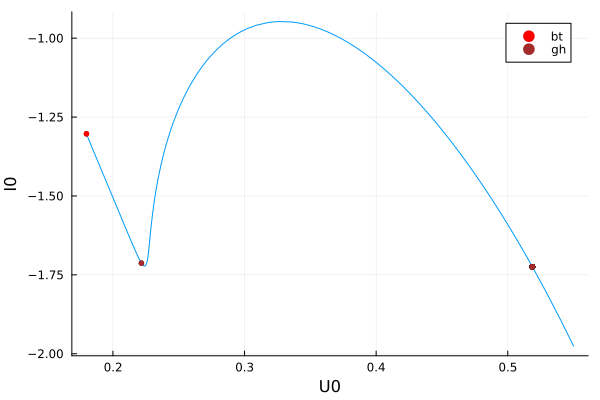

In [8]:
hp_codim2_1 = continuation(br, 1, (@lens _.U0),
    ContinuationPar(opts_con, pMin = 0.0, pMax = 0.55,
        ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
    # detection of codim 2 bifurcations with bisection
    detectCodim2Bifurcation = 2,
    # tell to start the Hopf problem using eigen elements: compute left eigenvector
    startWithEigen = true,
    # we update the Hopf problem at every continuation step
    updateMinAugEveryStep = 1,
    # compute both sides of the initial condition
    bothside = true,
    verbosity = 3
    )
plot(hp_codim2_1)

In [10]:
hp_codim2_1

 ┌─ Curve type: HopfCont
 ├─ Number of points: 214
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter U0 starts at 0.1798874870608784, ends at 0.55
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ≈ +0.17988749,                                                                     step =   0
- #  2,       bt at U0 ≈ +0.17988749 ∈ (+0.17988744, +0.17988749), |δp|=5e-08, [converged], δ = ( 0,  0), step =   0, eigenelements in eig[  1], ind_ev =   0
- #  3,       gh at U0 ≈ +0.22163355 ∈ (+0.22163355, +0.22163758), |δp|=4e-06, [converged], δ = ( 0,  0), step =  34, eigenelements in eig[ 35], ind_ev =   0
- #  4,       gh at U0 ≈ +0.51870852 ∈ (+0.51860149, +0.51870852), |δp|=1e-04, [converged], δ = ( 0,  0), step = 159, eigenelements in eig[160], ind_ev =   0
- #  5,       gh at U0 ≈ +0.51869137 ∈ (+0.51869092, +0.51869137), |δp|=4e-07, [converged], δ = ( 0,  0), s

In [11]:
hp_codim2_1[35]

(I0 = -1.712846288235767, U0 = 0.22163354833461535, ωₕ = 10.218023776753865, l1 = 0.00019210613553760636 + 0.9709559404215089im, BT = 10.218023776753865, GH = 0.00019210613553760636, x = 7.691841580090067, param = 0.22163354833461535, itnewton = 2, itlinear = 4, ds = -0.1, n_unstable = 0, n_imag = 0, stable = true, step = 34, eigenvals = ComplexF64[-2.1087650292628268e-8 - 10.218023721367148im, -2.1087650292628268e-8 + 10.218023721367148im, -0.4535777434351986 + 0.0im], eigenvecs = ComplexF64[-0.9997853500528465 - 0.0im -0.9997853500528465 + 0.0im 0.9654764021378872 + 0.0im; 0.01744756834163887 + 0.010764432236282262im 0.01744756834163887 - 0.010764432236282262im -0.026136904846498648 + 0.0im; -0.0014957600985266272 + 0.0025934299737738805im -0.0014957600985266272 - 0.0025934299737738805im 0.25917596169383766 + 0.0im])

In [12]:
hp_codim2_1.sol[35]

(x = [7.636193739951251, 0.7569188314965775, 0.5291936712184264, -1.712846288235767, 10.218023776753865], p = 0.22163354833461535, step = 34)

In [13]:
hp_codim2_1[1]

(I0 = -1.3029892787649975, U0 = 0.1798874870608784, ωₕ = -0.004099273561106481, l1 = 289.19292477792624 - 5.907819273647964e7im, BT = -0.004099273561106481, GH = 289.19292477792624, x = 5.150659211407544, param = 0.1798874870608784, itnewton = 2, itlinear = 4, ds = -0.1, n_unstable = 0, n_imag = 0, stable = true, step = 0, eigenvals = ComplexF64[-2.9036862215158724e-7 - 0.075219043021921im, -2.9036862215158724e-7 + 0.075219043021921im, -0.3030394313589299 + 0.0im], eigenvecs = ComplexF64[0.9974623108269425 - 0.0im 0.9974623108269425 + 0.0im -0.0004339308830098702 + 0.0im; -0.027105243591701363 - 0.00013645812571871533im -0.027105243591701363 + 0.00013645812571871533im 1.2037191804263925e-5 + 0.0im; -0.06381514169548913 - 0.016181882436080857im -0.06381514169548913 + 0.016181882436080857im -0.999999905779543 + 0.0im])

In [14]:
sn_codim2_1 = continuation(hp_codim2_1, 2,
    ContinuationPar(opts_con, pMin = 0.0, pMax = 0.4,
        ds = 0.001, dsmax = 0.1, dsmin = 1e-5),
    # detection of codim 2 bifurcations with bisection
    detectCodim2Bifurcation = 2,
    # tell to start the Hopf problem using eigen elements: compute left eigenvector
    startWithEigen = true,
    # we update the Hopf problem at every continuation step
    updateMinAugEveryStep = 1,
    # compute both sides of the initial condition
    bothside = true,
    verbosity = 3
    )

 ┌─ Curve type: FoldCont from BogdanovTakens bifurcation point.
 ├─ Number of points: 91
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter U0 starts at 0.3901567903532747, ends at 0.4
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at U0 ≈ +0.40000000,                                                                     step =   0
- #  2,     cusp at U0 ≈ +0.16172428 ∈ (+0.16172428, +0.16172428), |δp|=2e-11, [   guessL], δ = ( 0,  0), step =  16, eigenelements in eig[ 17], ind_ev =   0
- #  3,       bt at U0 ≈ +0.17988639 ∈ (+0.17988639, +0.17988648), |δp|=9e-08, [converged], δ = ( 0,  0), step =  44, eigenelements in eig[ 45], ind_ev =   0
- #  4, endpoint at U0 ≈ +0.40000000,                                                                     step =  90


In [15]:
sn_codim2_1[16]

(I0 = -1.1200596482046454, U0 = 0.16193284544777642, BT = 0.010625546204470785, CP = -0.004821757392595041, ZH = 0, x = 3.835511328120678, param = 0.16193284544777642, itnewton = 2, itlinear = 4, ds = -0.04565297391797413, n_unstable = 0, n_imag = 0, stable = true, step = 15, eigenvals = ComplexF64[-1.0882573271350782e-11 + 0.0im, -0.3030302971660217 + 0.0im, -3.8155773300322147 + 0.0im], eigenvecs = ComplexF64[-0.9989250598818357 + 0.0im -5.229967999754139e-7 + 0.0im -0.9992070420046493 + 0.0im; 0.028940671538677718 + 0.0im 1.5467107966425255e-8 + 0.0im 0.03958572450297103 + 0.0im; 0.03620997474400421 + 0.0im 0.9999999999998631 + 0.0im -0.004272894088804965 + 0.0im])

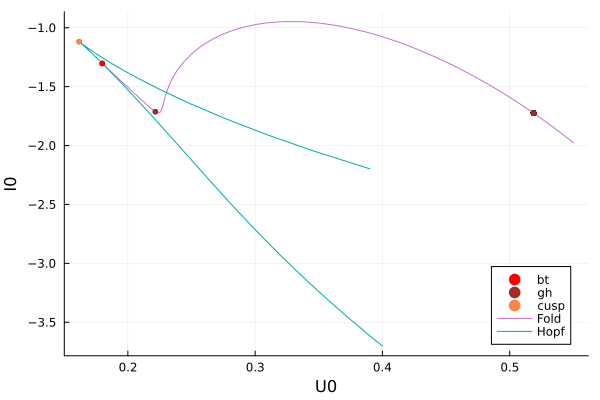

In [16]:
plot(hp_codim2_1, sn_codim2_1, branchlabel = ["Fold", "Hopf"])